# Explore here

We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

Step 1: Loading the dataset. In this case, we are only interested in the Latitude, Longitude and MedInc columns.

Step 2: Build a K-Means
Classify the data into 6 clusters using the K-Means model. Then store the cluster to which each house belongs as a new column in the dataset. You could call it cluster. To introduce it to your dataset, you may have to categorize it. See what format and values it has, and act accordingly. Plot it in a dot plot and describe what you see.

Step 3: Predict with the test set
Now use the trained model with the test set and add the points to the above plot to confirm that the prediction is successful or not.

Step 4: Train a supervised classification model
Now that K-Means has returned a categorization (clustering) of the points for the training and test sets, study which model might be most useful and train it. Get the statistics and describe what you see.

This flow is very common when we have unlabeled data: use an unsupervised learning model to label it automatically, and then a supervised learning model.

Step 5: Save the models
Store both models in the corresponding folder.



In [32]:
import pandas as pd
import seaborn as sns
from seaborn.objects import Dots, Plot
import matplotlib.pyplot as plt
from pickle import dump
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import make_scorer, silhouette_score, accuracy_score

## Load the Data

In [2]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
raw_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Select the necessary features

In [3]:
raw_data = raw_data[['Latitude', 'Longitude', 'MedInc']]
raw_data

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


## Split the data into training and testing sets

In [4]:
X_train, X_test = train_test_split(raw_data, test_size=0.2, random_state=42)

In [5]:
X_train

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542
...,...,...,...
11284,33.78,-117.96,6.3700
11964,34.02,-117.43,3.0500
5390,34.03,-118.38,2.9344
860,37.58,-121.96,5.7192


In [6]:
X_test

,Latitude,Longitude,MedInc
20046,36.06,-119.01,1.6812
3024,35.14,-119.46,2.5313
15663,37.80,-122.44,3.4801
20484,34.28,-118.72,5.7376
9814,36.62,-121.93,3.7250
...,...,...,...
15362,33.36,-117.22,4.6050
16623,35.36,-120.83,2.7266
18086,37.31,-122.05,9.2298
2144,36.77,-119.76,2.7850


## Tune the hyperparameters

In [7]:
kmeans = KMeans(n_init=10, n_clusters=6, random_state=42)

In [8]:
hyperparams = {
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan'],
    'max_iter': [100, 200, 300]
}

scoring = make_scorer(silhouette_score, metric='euclidean')

In [9]:
halving_search = HalvingGridSearchCV(kmeans, hyperparams, scoring=scoring, factor=2, resource='n_samples', cv=5)
halving_search

HalvingGridSearchCV(estimator=KMeans(n_clusters=6, n_init=10, random_state=42),
                    factor=2,
                    param_grid={'algorithm': ['lloyd', 'elkan'],
                                'init': ['k-means++', 'random'],
                                'max_iter': [100, 200, 300]},
                    scoring=make_scorer(silhouette_score, response_method='predict', metric=euclidean))

In [10]:
run_half_grid = True

if run_half_grid:
    import warnings
    warnings.filterwarnings('ignore')

    halving_search.fit(X_train)
    print(f"Best hyperparameters: {halving_search.best_params_}")

Best hyperparameters: {'algorithm': 'elkan', 'init': 'random', 'max_iter': 200}


In [11]:
tuned_kmeans = KMeans(n_init=10, n_clusters=6, algorithm='elkan', init='random', max_iter=200)
tuned_kmeans.fit(X_train)

KMeans(algorithm='elkan', init='random', max_iter=200, n_clusters=6, n_init=10)

In [12]:
labels = tuned_kmeans.labels_
labels

array([3, 3, 2, ..., 3, 1, 4], shape=(16512,), dtype=int32)

In [13]:
X_train['cluster'] = labels
X_train

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,3
17445,34.66,-120.48,4.1563,2
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,2
...,...,...,...,...
11284,33.78,-117.96,6.3700,0
11964,34.02,-117.43,3.0500,3
5390,34.03,-118.38,2.9344,3
860,37.58,-121.96,5.7192,1


## Visulize the training data

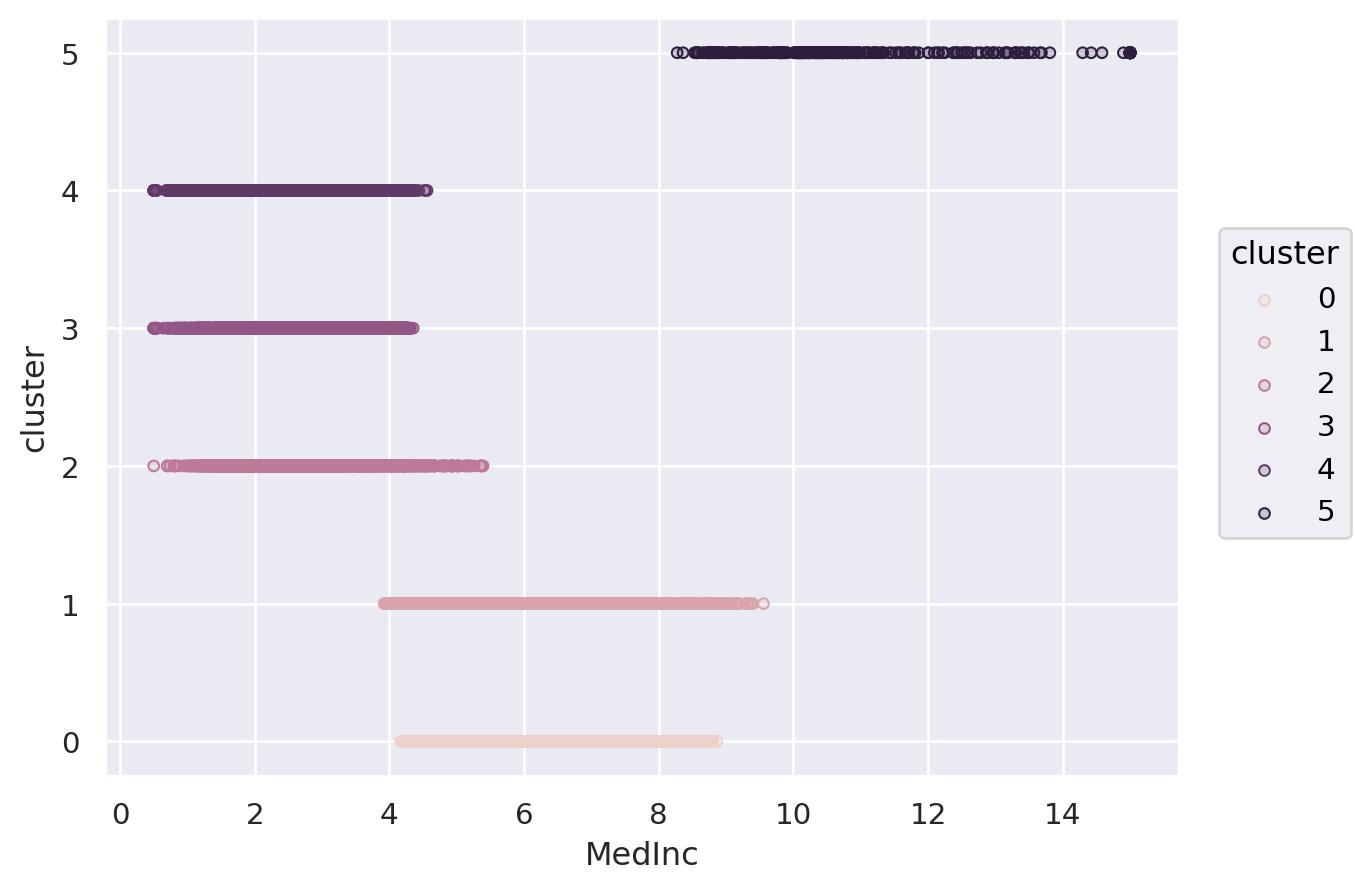

In [14]:
p1 = Plot(X_train, 'MedInc', 'cluster', color='cluster')
p1.add(Dots())

<Axes: xlabel='cluster', ylabel='count'>

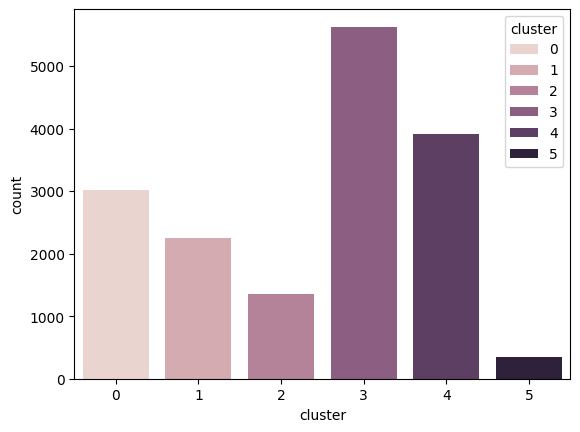

In [15]:
sns.countplot(data=X_train, x='cluster', hue='cluster')

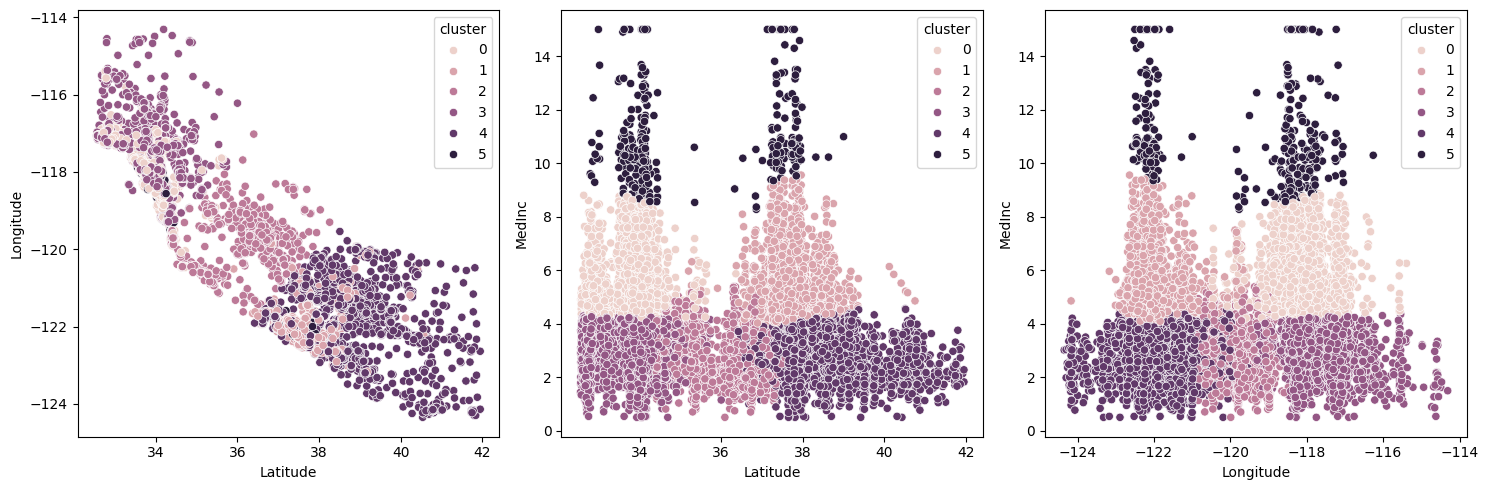

In [16]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster")
plt.tight_layout()

plt.show()

## Use the model to properly cluster the test data

In [17]:
y_test = tuned_kmeans.predict(X_test)
X_test['cluster'] = y_test
X_test

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,2
3024,35.14,-119.46,2.5313,2
15663,37.80,-122.44,3.4801,4
20484,34.28,-118.72,5.7376,0
9814,36.62,-121.93,3.7250,4
...,...,...,...,...
15362,33.36,-117.22,4.6050,0
16623,35.36,-120.83,2.7266,2
18086,37.31,-122.05,9.2298,1
2144,36.77,-119.76,2.7850,2


## Visualize the test data

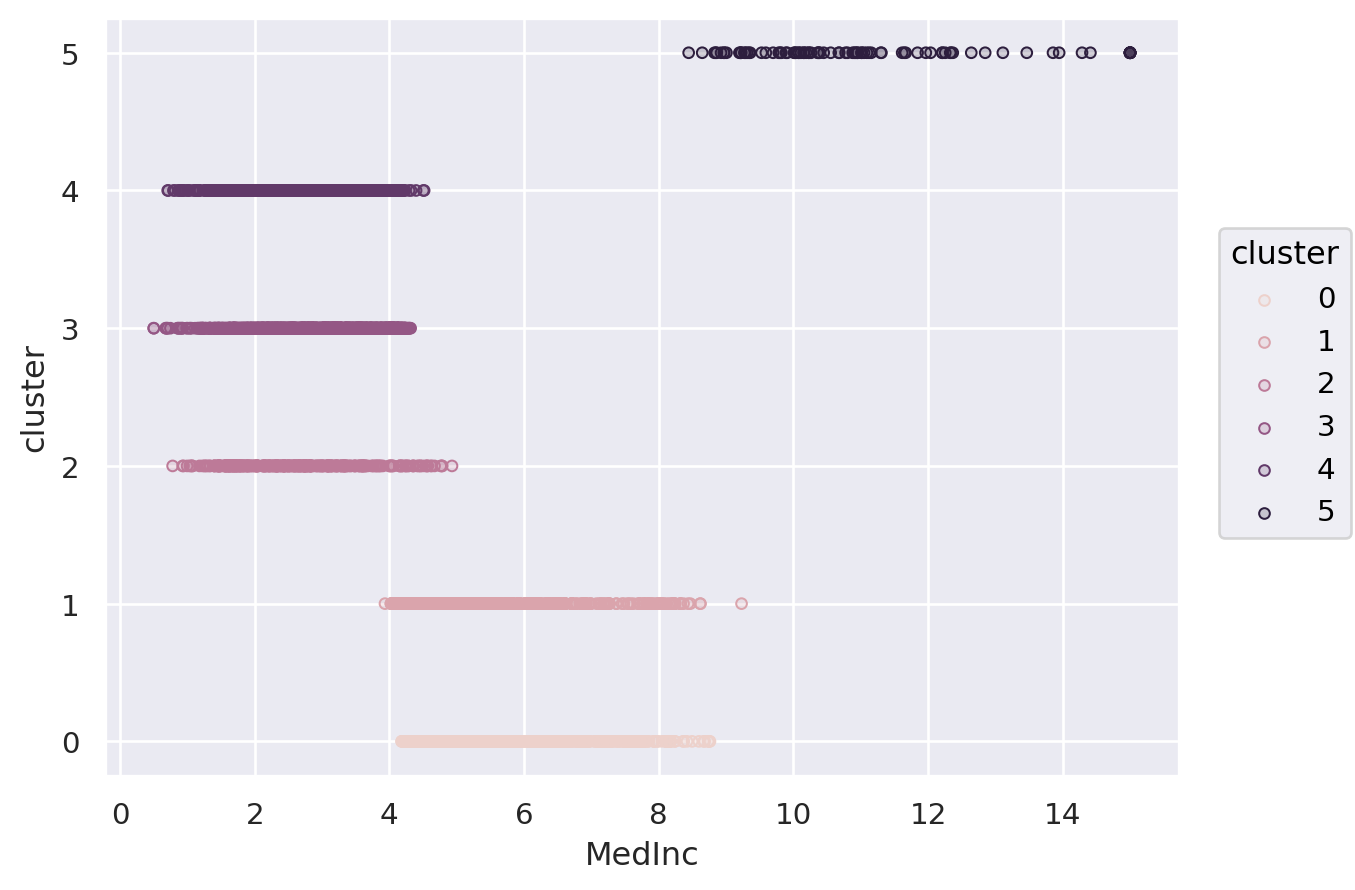

In [18]:
p1 = Plot(X_test, 'MedInc', 'cluster', color='cluster')
p1.add(Dots())

<Axes: xlabel='cluster', ylabel='count'>

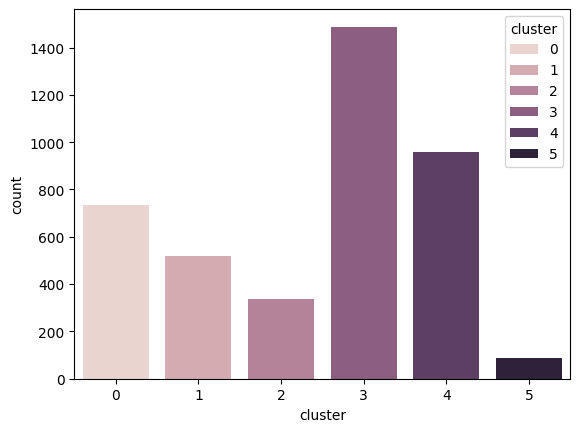

In [19]:
sns.countplot(data=X_test, x='cluster', hue='cluster')

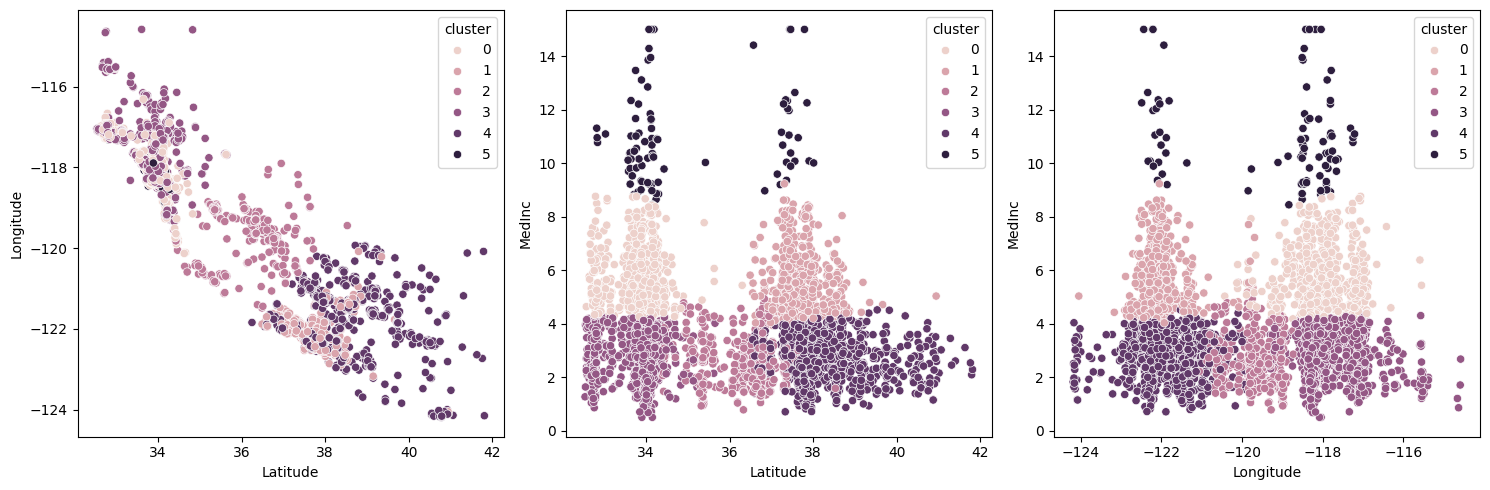

In [20]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster")
plt.tight_layout()

plt.show()

# Decide which supervised model to train using the data.

I've decided to use the random forest model, as it handles classification tasks well. Next I will preprocess the data in preparation for the model.

## Investigate Outliers

<Axes: ylabel='MedInc'>

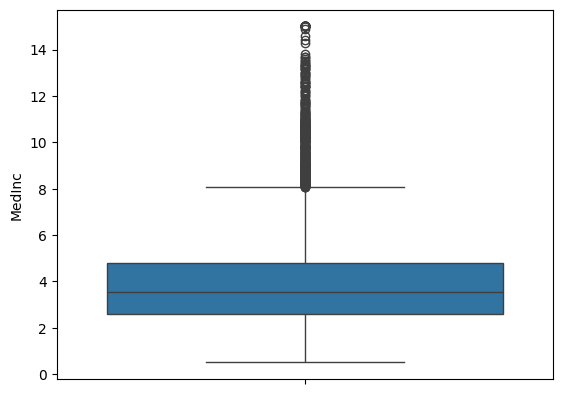

In [21]:
sns.boxplot(data=X_train['MedInc'])

In [22]:
MedInc_stats = X_train['MedInc'].describe()
MedInc_stats

count    16512.000000
mean         3.880754
std          1.904294
min          0.499900
25%          2.566700
50%          3.545800
75%          4.773175
max         15.000100
Name: MedInc, dtype: float64

In [23]:
iqr = MedInc_stats['75%'] - MedInc_stats['25%']
upper_limit = MedInc_stats['75%'] + 1.5 * iqr
print(f"Outlier upper limit: {round(upper_limit, 2)}")
outliers = X_train[X_train['MedInc'] > upper_limit]
outliers

Outlier upper limit: 8.08


,Latitude,Longitude,MedInc,cluster
18056,37.24,-121.98,8.5425,1
5252,34.10,-118.47,11.1978,5
10537,33.50,-117.70,8.7591,0
1621,37.82,-122.08,11.3421,5
11009,33.79,-117.76,8.2653,0
...,...,...,...,...
5258,34.07,-118.49,13.5728,5
1585,37.84,-122.00,9.5271,5
17159,37.40,-122.20,8.2782,1
8792,33.80,-118.45,11.9993,5


In [24]:
outliers['Latitude'].unique

<bound method Series.unique of 18056    37.24
5252     34.10
10537    33.50
1621     37.82
11009    33.79
         ...  
5258     34.07
1585     37.84
17159    37.40
8792     33.80
3556     34.25
Name: Latitude, Length: 529, dtype: float64>

In [25]:
outliers['Longitude'].unique

<bound method Series.unique of 18056   -121.98
5252    -118.47
10537   -117.70
1621    -122.08
11009   -117.76
          ...  
5258    -118.49
1585    -122.00
17159   -122.20
8792    -118.45
3556    -118.56
Name: Longitude, Length: 529, dtype: float64>

In [26]:
outliers['MedInc'].unique

<bound method Series.unique of 18056     8.5425
5252     11.1978
10537     8.7591
1621     11.3421
11009     8.2653
          ...   
5258     13.5728
1585      9.5271
17159     8.2782
8792     11.9993
3556      8.5650
Name: MedInc, Length: 529, dtype: float64>

<Axes: xlabel='cluster', ylabel='count'>

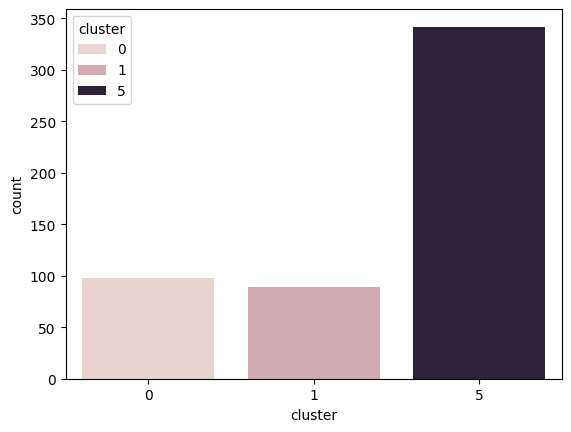

In [27]:
sns.countplot(data=outliers, x='cluster', hue='cluster')

I will keep all the outliers as there are no zeros, nan values, or place holder values.

## Create and train the Random forest model

In [28]:
y_train = X_train['cluster']
X_train = X_train.drop(columns='cluster')
random_forest_model = RandomForestClassifier(random_state=42)
scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)
scores

array([0.9972752 , 0.99333939, 0.99666869, 0.9954573 , 0.99576015])

In [29]:
y_test = X_test['cluster']
X_test = X_test.drop(columns='cluster')
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
y_pred

array([2, 2, 4, ..., 1, 2, 3], shape=(4128,), dtype=int32)

In [31]:
accuracy_score(y_test, y_pred)

0.9956395348837209

In [36]:
dump(tuned_kmeans, open("../models/tuned-kmeans_n_init-10_n_clusters-6_algorithm-elkan_init-random_max_iter-200_42.sav", "wb"))
dump(random_forest_model, open("../models/random_forest_classifier_default_42.sav", "wb"))